In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_7_optimization.ipynb")

# Getting a ball in a hoop

We're going to set up an fmin problem where the goal is to find a launching velocity that launches a ball so that it passes through a "hoop". To make this problem "interesting" we're going to make it so we can change a bunch of things. These things are "fixed" for the run of fmin - i.e., we decide what they are and then solve for the launching velocity that gets the ball in the hoop. But we can set up, for example, that we have a really heavy ball that starts much lower than the hoop in very light gravity. More explicitly, these are the things we can change (see also images in slides)

- Gravity - just in case we're playing on a different planet
- Mass - make the ball heavier/lighter
- Starting position - where the ball launches from in x,y
- Hoop location (x,y)

Given all those, we'll use **fmin** to find a starting velocity that gets the ball in the hoop.

Slides: https://docs.google.com/presentation/d/1m-8UphLgGLVaDKKcZ-NA_ejgOFlkD1Rlz3_sW0fHBM8/edit?usp=sharing

In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

# New scipy import that finds the minima of a function
from scipy.optimize import fmin

## Ball in the hoop simulation

The first thing we need is code to launch the ball and track it as it goes up and down. 

This is written for you, along with the plot code. Your TODO is to edit the starting vector until the ball gets at least close to the hoop. A "manual" version of **fmin**.

In [3]:
def ball_launch(x_y_location, vx_vy_start, mass, gravity, height_to_stop):
    """ Launch a ball and let it go up and then down until it drops below the given height
    @param x_y_location: A 1x2 numpy array containing the x,y position to launch from
    @param vx_vy_start: a 1x2 numpy array containing the vector direction and magnitude the ball launches in
    @param mass: Mass of the ball
    @param gravity: Gravity acting on the ball
    @param height_to_stop: What y value to stop at
    @return the list of x,y locations the ball pasess through as a 2xn array (x top row, y bottom row) """

    assert gravity < 0  # otherwise we fly up into the sky
    assert mass > 0     # otherwise we don't weigh anything

    # Copy so we make new storage for these - otherwise we will overwrite x_y_location and vx_vy_start
    cur_loc = x_y_location.copy()
    cur_vel = vx_vy_start.copy()

    # dvx is 0, dvy is gravity f = ma with f gravity, so g/m
    cur_acceleration = np.zeros(x_y_location.shape)
    cur_acceleration[0] = 0
    cur_acceleration[1] = gravity / mass

    # A list to put the x,y poses in
    ret_poses = []

    # Could pass this in as well, but we'll just use this as a reasonable value
    delta_t = 0.01

    # Put the first location in as a 2x1 list
    ret_poses.append([cur_loc[0], cur_loc[1]])
    # Keep integrating foward until ball passes below the hoop line
    #   ODE would do a much better job, but harder to tell it when to stop
    while cur_loc[1] > height_to_stop:
        cur_loc = cur_loc + cur_vel * delta_t
        cur_vel = cur_vel + cur_acceleration * delta_t
        ret_poses.append([cur_loc[0], cur_loc[1]])

    return np.array(ret_poses).transpose()

In [4]:
def plot_ball_track(axs, x_y_location, vx_vy_start, poses, hoop_pos):
    """Plot the ball track plus starting/ending locations
    @param axs - axes to plot in
    @param x_y_location - 2x1 numpy array with the location the ball launches from
    @param vx_vy_start - 2x1 numpy array with the launch direction
    @param poses - 2xn list with the poses the ball passes through
    @param hoop_pos - 2x1 numpy array with the hoop location"""

    axs.plot(x_y_location[0], x_y_location[1], marker='X', color='red', markersize=10, label='Start')
    axs.plot([x_y_location[0], x_y_location[0] + vx_vy_start[0]], 
             [x_y_location[1], x_y_location[1] + vx_vy_start[1]], '-r', label="Start dir")
    axs.plot(poses[0, :], poses[1, :], '.k', label="Path")
    axs.plot([hoop_pos[0]-0.1, hoop_pos[0] + 0.1], [hoop_pos[1], hoop_pos[1]], '-g', label='Hoop')

    axs.legend()
    axs.axis('equal')

In [5]:
# Starting location and velocity
x_y_location = np.array([0, 0])
vx_vy_start_misses = np.array([1, 2])   # This one misses
vx_vy_start_hits = np.array([1, 2])     # Change this until the ball goes through the hoop

vx_vy_start_hits[0] = 1
vx_vy_start_hits[1] = 14

# These stay the same for the entire simulation
gravity = -9.8
mass = 1.0
height = -1.0

poses_misses = ball_launch(x_y_location=x_y_location, vx_vy_start=vx_vy_start_misses, mass=mass, gravity=gravity, height_to_stop=height)
poses_hits = ball_launch(x_y_location=x_y_location, vx_vy_start=vx_vy_start_hits, mass=mass, gravity=gravity, height_to_stop=height)

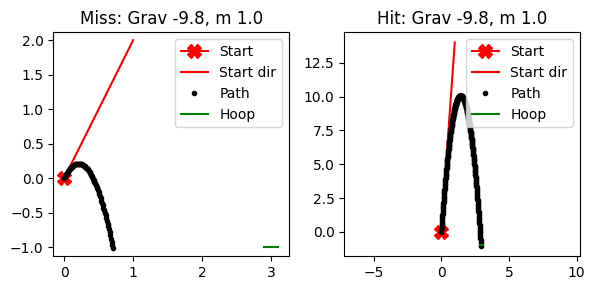

In [6]:
# Setting this up for you - plot the miss and the hit. This is just a visual check that your "hit" and "miss" do the right thing
#   TODO Use this to keep tweaking vx_vy_start_hits until the ball passes "through" the hoop

# Plot the result
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

plot_ball_track(axs[0], x_y_location=x_y_location, vx_vy_start=vx_vy_start_misses, poses=poses_misses, hoop_pos=[3.0, height])
axs[0].set_title(f"Miss: Grav {gravity}, m {mass}")

plot_ball_track(axs[1], x_y_location=x_y_location, vx_vy_start=vx_vy_start_hits, poses=poses_hits, hoop_pos=[3.0, height])
axs[1].set_title(f"Hit: Grav {gravity}, m {mass}")

fig.tight_layout()
plt.show()

In [7]:
# Last pose is "in" the hoop
assert(np.isclose(poses_hits[0, -1], 3, atol=0.1))
assert(np.isclose(poses_hits[0, -2], 3, atol=0.1))

# TODO: Write two assert statements (one for the last pose and one for the second to last pose)
#  that are true if the ball passes "through" the hoop.
#   The center of the hoop is located at 3.0 and it is 0.2 in diameter (see plot of hoop in plot code)

In [8]:
grader.check("best_guess")

best_guess results: All test cases passed!

## Create the function that will be passed to fmin

TODO: edit **func_for_fmin** to take in a numpy array for the launch direction and returns a "score" for how close the ball is to passing through the hoop. This "score" needs to be greater than zero and get smaller as the ball gets closer.

Some things about this function:
- the first argument MUST be a numpy array of size 2x1 (the launch velocity). This is what fmin is going to search over
- you will also need to pass in the remaining information that doesn't change (starting pose, gravity, mass, hoop position). How you do this is up to you; options include using a dictionary or just passing the paramters in
- **func_for_fmin** will call **ball_launch**
- The return values should be a positive number that is smaller when the last pose is closer to the hoop center
- **func_for_fmin** needs both the hoop x position and the hoop height. **ball_launch** just takes a height to stop at.

You might want to look ahead to the next problem (where you will call **fmin** with this function). How you set up **func_for_fmin** will change how you call **fmin**

In [9]:

# TODO Determine which arguments you want to pass to this function and HOW you want to pass them
# TODO You must write comments for the parameters
def func_for_fmin(launch_velocity, starting_pose, gravity, mass, hoop_position_x, hoop_position_y):
    # launch velocity - starting vector of velocity 
    # starting pose - starting position from origin
    # gravity - acceleration of gravity (m/s^2)
    # mass - mass of ball (kg)
    # hoop_position_x - position of hoop in x (meters from origin)
    # hoop_position_y - position of hoop in y (meters from origin)
    pose_array = ball_launch(x_y_location=starting_pose, vx_vy_start=launch_velocity, mass=mass, gravity=gravity, height_to_stop=hoop_position_y)
    
    end_pose = pose_array[0, -1]
    ratio = (np.absolute(hoop_position_x - end_pose))/hoop_position_x
    return ratio



In [10]:
# Call your function once with vx_vy_start_misses and once with vx_vy_start_hits. Check that
#  the return value of the call with hits is less than the return value of the call with misses.

# You might want to make a variable that holds the hoop x location 3.0, and the height (from the first problem). Or you
#  can just pass in those two values separately. No "right" answer, just document what you chose to do.

# TODO: Call func_for_fmin twice, once with the "misses" and once with the "hits" starting values. Use this to check
# that your function is at least returning a bigger number for the "misses" than the "hits"
miss_ret_value = func_for_fmin(launch_velocity=vx_vy_start_misses, starting_pose=x_y_location, gravity=gravity, mass=mass, hoop_position_x=3, hoop_position_y=-1)
hit_ret_value = func_for_fmin(launch_velocity=vx_vy_start_hits, starting_pose=x_y_location, gravity=gravity, mass=mass, hoop_position_x=3, hoop_position_y=-1)

# And here is the actual check
assert hit_ret_value < miss_ret_value

# And a few more checks
assert hit_ret_value >= 0.0
assert miss_ret_value >= 0.0
# Doesn't strictly have to be true - but if it's really big there's probably something wrong with your equation(s)
assert hit_ret_value < 0.1

In [11]:
grader.check("fmin_func")

fmin_func results: All test cases passed!

## Call fmin

Now you're going to call **fmin** with your **func_for_fmin** function. 

In [12]:
# Starting location and velocity (copied from above)
x_y_location = np.array([0, 0])

# These stay the same for the entire simulation
gravity = -9.8
mass = 1.0
height = -1.0

# Your starting vector for the search MUST BE (1, 2) (same as vx_vy_start_misses)

# The ending hoop location must be 3.0, -1.0 (same as before)


In [13]:
# TODO Call fmin with your function, with the parameters as given above, and a starting vector of 1,2.
#  Store the resulting vector in vx_vy_start_best

vx_vy_start_best = fmin(lambda launch_velocity: func_for_fmin(launch_velocity, x_y_location, gravity, mass, hoop_position_x=3, hoop_position_y=-1), np.array([1, 2]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 76
         Function evaluations: 139


In [14]:
# Rather than check the starting vector to see if it's the same as the solution (there could be more that one solution) we'll check the
#  final pose again

poses_misses = ball_launch(x_y_location=x_y_location, vx_vy_start=vx_vy_start_misses, mass=mass, gravity=gravity, height_to_stop=height)
poses_best = ball_launch(x_y_location=x_y_location, vx_vy_start=vx_vy_start_best, mass=mass, gravity=gravity, height_to_stop=height)

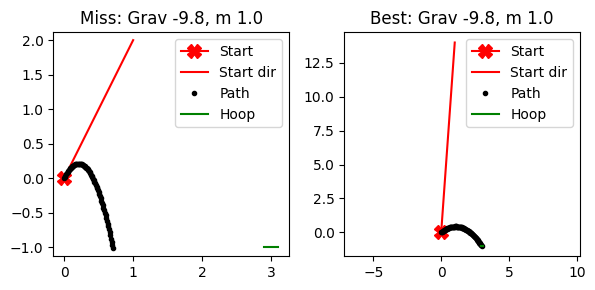

In [15]:
# Plot the result
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

plot_ball_track(axs[0], x_y_location=x_y_location, vx_vy_start=vx_vy_start_misses, poses=poses_misses, hoop_pos=[3.0, height])
axs[0].set_title(f"Miss: Grav {gravity}, m {mass}")

plot_ball_track(axs[1], x_y_location=x_y_location, vx_vy_start=vx_vy_start_hits, poses=poses_best, hoop_pos=[3.0, height])
axs[1].set_title(f"Best: Grav {gravity}, m {mass}")

fig.tight_layout()

In [16]:
# TODO Manually graded: Write a test that checks that, when you call func_for_fmin with vx_vy_start_best, you get the expected minimum value
# Note: The actual *value* you get will depend on how you wrote your func_for_fmin.

assert np.isclose(func_for_fmin(vx_vy_start_best, x_y_location, gravity, mass, hoop_position_x=3, hoop_position_y=-1), 0, rtol=0.00001)

# TODO: Call your func_for_fmin problem with the vector fmin returned
#  Write an assert statement that checks that the value is what you expected it to be. 
#   The expected value is probably zero... but it doesn't have to be

res_func_for_fmin = func_for_fmin(vx_vy_start_best, x_y_location, gravity, mass, hoop_position_x=3, hoop_position_y=-1)
# replace True with an equation (np.isclose is a good choice) that checks that res_func_for_fmin is the value you expect
assert True


In [17]:
grader.check("call_fmin")

call_fmin results: All test cases passed!

## Make it work for another setup

Other than filling in the call for **fmin**, you shouldn't have to change anything to make this work - this just changes the default values for the starting position, gravity, mass, and the ending hoop location.

In [18]:
# Starting location and velocity
x_y_location_heavy = np.array([-2, 1])
vx_vy_start_heavy_misses = np.array([2, 3])   # This one misses

# These stay the same for the entire simulation
gravity_heavy = -20.8
mass_heavy = 10.0
height_heavy = -3.0
hoop_heavy_x_loc = 3.0


# TODO: Call fmin with the heavy parameters
vx_vy_start_heavy_hits = fmin(lambda launch_velocity: func_for_fmin(launch_velocity, x_y_location_heavy, gravity_heavy, mass_heavy, hoop_heavy_x_loc, height_heavy), vx_vy_start_heavy_misses)
assert(True)
poses_heavy_misses = ball_launch(x_y_location=x_y_location_heavy, vx_vy_start=vx_vy_start_heavy_misses, mass=mass_heavy, gravity=gravity_heavy, height_to_stop=height_heavy)
poses_heavy_hits = ball_launch(x_y_location=x_y_location_heavy, vx_vy_start=vx_vy_start_heavy_hits, mass=mass_heavy, gravity=gravity_heavy, height_to_stop=height_heavy)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 82


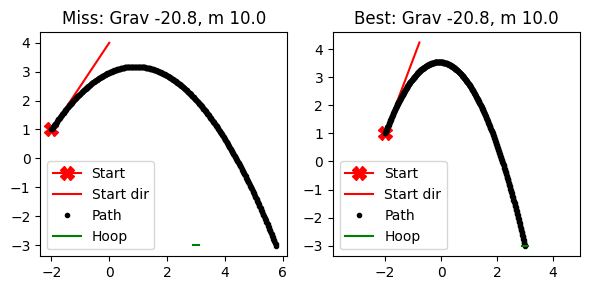

In [19]:
# Plot the result
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

plot_ball_track(axs[0], x_y_location=x_y_location_heavy, vx_vy_start=vx_vy_start_heavy_misses, poses=poses_heavy_misses, hoop_pos=[hoop_heavy_x_loc, height_heavy])
axs[0].set_title(f"Miss: Grav {gravity_heavy}, m {mass_heavy}")

plot_ball_track(axs[1], x_y_location=x_y_location_heavy, vx_vy_start=vx_vy_start_heavy_hits, poses=poses_heavy_hits, hoop_pos=[hoop_heavy_x_loc, height_heavy])
axs[1].set_title(f"Best: Grav {gravity_heavy}, m {mass_heavy}")

fig.tight_layout()

In [20]:
grader.check("heavy_ball_in_light_gravity")

heavy_ball_in_light_gravity results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [21]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS I25 (creates a set)
websites = {"https://numpy.org/doc/stable/reference/generated/numpy.fmin.html, https://www.w3schools.com/python/python_lambda.asp"}
# Approximate number of hours, including lab/in-class time
hours = 1.5

In [22]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

All the usual - rerun, remove print statements, save. Make sure plots are visible.

- Submit this .ipynb file to Lab 7 (fmin)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Almost to the end of term!